# 쿨백-라이블러 발산 (Kullback-Leibler Divergence)

### 개념 요약
쿨백-라이블러 발산(KL Divergence)은 두 확률분포의 차이를 측정하는 방법임. 정보 이론에 기반하여 한 확률분포가 다른 확률분포를 얼마나 잘 근사하는지를 정량적으로 나타냄. 

이 값은 두 분포가 얼마나 '유사하지 않은지(dissimilar)'에 대한 척도로, 머신러닝에서는 모델이 예측한 확률분포와 실제 데이터의 확률분포 간의 차이를 줄이는 손실 함수(Loss Function) 등으로 널리 사용됨. KL Divergence는 항상 0 이상의 값을 가지며, 두 분포가 완전히 동일할 때 0이 됨.

### 수학적 배경 📐
실제 확률분포를 $P$, 모델이 근사한 확률분포를 $Q$라고 할 때, 이산 확률 변수에 대한 KL Divergence는 다음과 같이 정의됨.

$$D_{KL}(P \| Q) = \sum_{x \in \mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$

여기서 $D_{KL}(P \| Q)$는 $Q$에 대한 $P$의 KL 발산을 의미하며, 두 분포의 순서가 바뀌면 값이 달라지는 **비대칭(asymmetric)** 특징을 가짐. 즉, $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$ 임.

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)

In [2]:
# P: 실제 확률분포 (True Distribution)
p = np.array([0.1, 0.2, 0.7])

# Q: P를 근사하는 모델의 확률분포 (Approximating Distribution)
q = np.array([0.2, 0.2, 0.6])

# 데이터 확인
print(f"P 분포: {p}, 합계: {np.sum(p):.1f}")
print(f"Q 분포: {q}, 합계: {np.sum(q):.1f}")

P 분포: [0.1 0.2 0.7], 합계: 1.0
Q 분포: [0.2 0.2 0.6], 합계: 1.0


### 핵심 로직 구현 (Code Implementation)

In [3]:
def kl_divergence(p, q):
    """ KL-Divergence를 계산하는 함수 """
    
    # P(x) / Q(x) 계산 (요소별 나눗셈)
    # 이 과정은 두 분포의 각 이벤트에서 확률의 비율을 나타냄
    ratio = p / q
    print(f"P/Q 비율: {ratio}")
    
    # log(P(x) / Q(x)) 계산
    # 비율에 로그를 취해 정보량의 차원으로 변환
    log_ratio = np.log(ratio)
    print(f"log(P/Q) 값: {log_ratio}")
    
    # P(x) * log(P(x) / Q(x)) 계산
    # 실제 분포 P의 관점에서 정보량 차이의 기댓값을 구하기 위해 P(x)를 곱함
    product = p * log_ratio
    print(f"P * log(P/Q) 값: {product}")
    
    # 최종 합산
    # 모든 이벤트에 대한 기댓값을 더하여 최종 KL 발산 값을 구함
    divergence = np.sum(product)
    
    return divergence

### 결과 확인 및 시각화 📊

--- D_KL(P || Q) 계산 과정 ---
P/Q 비율: [0.5        1.         1.16666667]
log(P/Q) 값: [-0.69314718  0.          0.15415068]
P * log(P/Q) 값: [-0.06931472  0.          0.10790548]

D_KL(P || Q) 최종 결과: 0.0386

--- D_KL(Q || P) 계산 과정 ---
P/Q 비율: [2.         1.         0.85714286]
log(P/Q) 값: [ 0.69314718  0.         -0.15415068]
P * log(P/Q) 값: [ 0.13862944  0.         -0.09249041]

D_KL(Q || P) 최종 결과: 0.0461


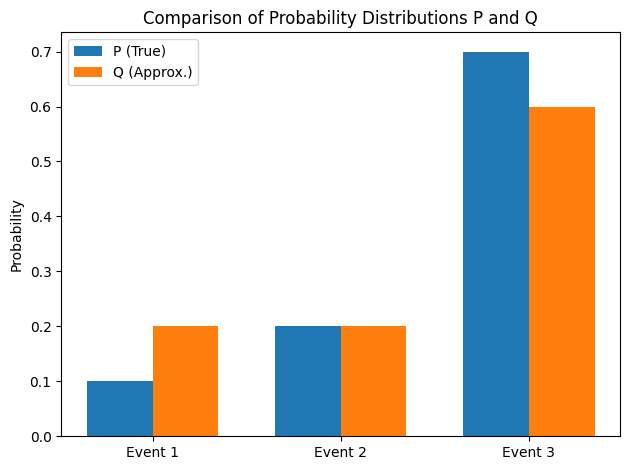

In [4]:
print("--- D_KL(P || Q) 계산 과정 ---")
kl_pq = kl_divergence(p, q)
print(f"\nD_KL(P || Q) 최종 결과: {kl_pq:.4f}\n")

print("--- D_KL(Q || P) 계산 과정 ---")
kl_qp = kl_divergence(q, p)
print(f"\nD_KL(Q || P) 최종 결과: {kl_qp:.4f}")

# 시각화
x = np.arange(p.shape[0])
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, p, width, label='P (True)')
rects2 = ax.bar(x + width/2, q, width, label='Q (Approx.)')

ax.set_ylabel('Probability')
ax.set_title('Comparison of Probability Distributions P and Q')
ax.set_xticks(x)
ax.set_xticklabels([f'Event {i+1}' for i in x])
ax.legend()

fig.tight_layout()
plt.show()

### 고려사항 (Considerations)
* **비대칭성**: 위 결과에서 볼 수 있듯이 $D_{KL}(P \| Q)$와 $D_{KL}(Q \| P)$는 다른 값을 가짐. 이는 KL Divergence가 '거리'의 수학적 정의(예: 대칭성, 삼각 부등식)를 만족하지 않음을 의미함.
* **정의역 문제**: 만약 어떤 이벤트 $x$에 대해 $P(x) > 0$ 이지만 $Q(x) = 0$ 이라면, $\log$ 항이 무한대로 발산하게 됨. 이는 실제로는 일어날 수 있는 이벤트를 모델이 절대 일어나지 않는다고 예측하는 상황으로, 모델에 매우 큰 페널티를 부여하는 것과 같음. 이를 방지하기 위해 보통 예측값에 아주 작은 값(epsilon)을 더하는 스무딩(smoothing) 기법을 사용함.

### 최종 요약 (Conclusion)
KL Divergence는 두 확률분포 간의 정보 엔트로피 차이를 측정하는 비대칭적 척도임. 예제를 통해 실제 분포 $P$와 이를 근사하는 분포 $Q$가 주어졌을 때, KL Divergence 값을 계산하는 과정과 그 비대칭적 특성을 확인함.

이 개념은 변분 오토인코더(VAE)와 같은 생성 모델의 학습이나, 강화학습에서 정책(policy)을 업데이트하는 등 머신러닝 분야에서 두 분포의 유사도를 측정하고 최적화하는 데 핵심적인 역할을 수행함.